# **Data Pre-processing**

### **Import Libraries**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_samples, silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle, Ellipse

import numpy as np
import pandas as pd
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Load Dataset**

In [65]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Global_cleaned.csv')
data.head()

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type
0,34393.0,24.0,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,247547.0,3
1,727022.0,250.0,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,350131.0,3
2,693697.0,1959.0,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,100319.0,3
3,22844.0,14.0,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,231497.0,3
4,36309.0,7.0,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,197655.0,3


In [66]:
data_backup = data
data_backup

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type
0,34393.000000,24.000000,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,2.475470e+05,3
1,727022.000000,250.000000,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,3.501310e+05,3
2,693697.000000,1959.000000,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,1.003190e+05,3
3,22844.000000,14.000000,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,2.314970e+05,3
4,36309.000000,7.000000,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,1.976550e+05,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,1.594339,64256.0,64896.0,1.202037e+09,1.485176e+08,0.595314,0.723920,0.032170,2.373585e+06,2
9896,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,1.400239,64256.0,64896.0,1.202037e+09,1.485176e+08,0.652207,0.874332,0.028468,2.367298e+06,2
9897,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,1.626468,64256.0,64896.0,1.202037e+09,1.485176e+08,0.876566,0.250007,0.041358,2.383580e+06,2
9898,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,1.408035,64256.0,64896.0,1.202037e+09,1.485176e+08,0.547553,0.645027,0.027258,2.384146e+06,2


### **Class Distribution Analysis**

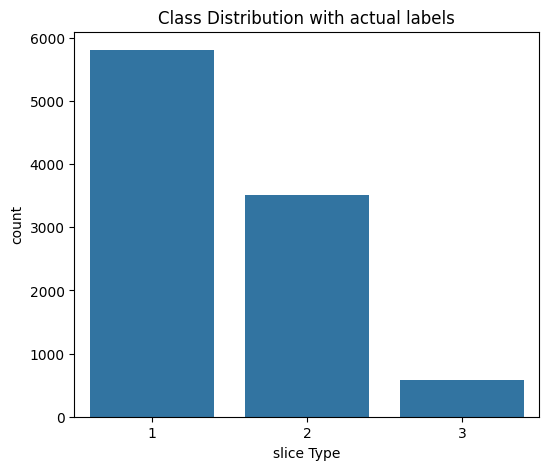

1    5808
2    3515
3     577
Name: slice Type, dtype: int64


In [67]:
plt.figure(figsize=(6, 5))
sns.countplot(x=data['slice Type'])
plt.title('Class Distribution with actual labels')
plt.show()
print(data['slice Type'].value_counts())

#### **Experiment 16 with undersampling**

Activate this section Experiment 16 when willing to perform undersampling before proceeding with the further steps.

In [68]:
# Identify the majority class
majority_class1 = data['slice Type'].value_counts().idxmax()
# Count the number of data points in the majority class
majority_count1 = data['slice Type'].value_counts()[majority_class1]

# Identify the second majority class
temp_data = data[data['slice Type'] != majority_class1]
majority_class2 = temp_data['slice Type'].value_counts().idxmax()
# Count the number of data points in the second majority class
majority_count2 = temp_data['slice Type'].value_counts()[majority_class2]

# Count the number of data points in the minority class
minority_count = data['slice Type'].value_counts().min()

# Calculate the number of data points to remove from the majority class
num_to_remove1 = majority_count1 - minority_count
num_to_remove2 = majority_count2 - minority_count

# Randomly select data points from the majority class to remove
majority_indices1 = data[data['slice Type'] == majority_class1].index
remove_indices1 = np.random.choice(majority_indices1, size=num_to_remove1, replace=False)
majority_indices2 = data[data['slice Type'] == majority_class2].index
remove_indices2 = np.random.choice(majority_indices2, size=num_to_remove2, replace=False)
remove_indices = np.concatenate((remove_indices1, remove_indices2))

# Remove the selected data points from the DataFrame
balanced_data = data.drop(remove_indices)

In [69]:
data = balanced_data
data.head()

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type
0,34393.0,24.0,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,247547.0,3
1,727022.0,250.0,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,350131.0,3
2,693697.0,1959.0,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,100319.0,3
3,22844.0,14.0,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,231497.0,3
4,36309.0,7.0,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,197655.0,3


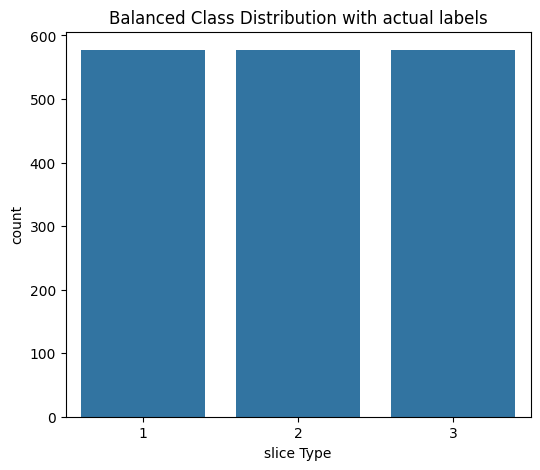

3    577
2    577
1    577
Name: slice Type, dtype: int64


In [70]:
plt.figure(figsize=(6, 5))
sns.countplot(x=data['slice Type'])
plt.title('Balanced Class Distribution with actual labels')
plt.show()
print(data['slice Type'].value_counts())

### **Define X and y**

In [71]:
X = data.drop(columns=['slice Type'])
X

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcRate,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
0,34393.000000,24.000000,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,2.475470e+05
1,727022.000000,250.000000,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,3.501310e+05
2,693697.000000,1959.000000,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,142.035370,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,1.003190e+05
3,22844.000000,14.000000,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,2.314970e+05
4,36309.000000,7.000000,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,5.111705,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,1.976550e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9853,455187.015908,203.546037,4.022208,3.999381,3.886815,3.335691,3.172771,3.326979,0.0,0.0,...,1.971841,1.229078,64256.0,64896.0,1.202037e+09,1.485176e+08,0.036293,0.001541,0.033020,2.353317e+06
9872,579881.542703,3384.297776,1.258912,1.725655,1.804138,1.534713,1.453858,1.323118,0.0,0.0,...,1.278798,1.271737,64128.0,65024.0,3.471280e+09,1.511629e+09,0.003863,0.001796,0.009998,2.369240e+06
9882,582014.461323,5184.341674,1.877904,1.389036,1.097236,1.435210,1.509168,1.200943,0.0,0.0,...,1.021140,1.166128,64128.0,65024.0,7.061805e+08,2.905999e+09,0.006719,0.001778,0.009530,2.264990e+06
9887,595101.894471,4654.304880,1.395809,1.232893,1.655131,1.566912,1.222781,1.472187,0.0,0.0,...,1.038199,1.509496,64128.0,65024.0,7.061805e+08,2.905999e+09,0.011743,0.001713,0.005189,2.377580e+06


In [72]:
features = X.columns.tolist()
features
print(len(features))

43


In [73]:
y = data['slice Type']
y

0       3
1       3
2       3
3       3
4       3
       ..
9853    2
9872    2
9882    2
9887    2
9896    2
Name: slice Type, Length: 1731, dtype: int64

In [74]:
np.unique(y)

array([1, 2, 3])

### **Apply t-sne to X**

In [75]:
X_backup = X
X_backup

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcRate,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
0,34393.000000,24.000000,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,2.475470e+05
1,727022.000000,250.000000,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,3.501310e+05
2,693697.000000,1959.000000,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,142.035370,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,1.003190e+05
3,22844.000000,14.000000,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,2.314970e+05
4,36309.000000,7.000000,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,5.111705,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,1.976550e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9853,455187.015908,203.546037,4.022208,3.999381,3.886815,3.335691,3.172771,3.326979,0.0,0.0,...,1.971841,1.229078,64256.0,64896.0,1.202037e+09,1.485176e+08,0.036293,0.001541,0.033020,2.353317e+06
9872,579881.542703,3384.297776,1.258912,1.725655,1.804138,1.534713,1.453858,1.323118,0.0,0.0,...,1.278798,1.271737,64128.0,65024.0,3.471280e+09,1.511629e+09,0.003863,0.001796,0.009998,2.369240e+06
9882,582014.461323,5184.341674,1.877904,1.389036,1.097236,1.435210,1.509168,1.200943,0.0,0.0,...,1.021140,1.166128,64128.0,65024.0,7.061805e+08,2.905999e+09,0.006719,0.001778,0.009530,2.264990e+06
9887,595101.894471,4654.304880,1.395809,1.232893,1.655131,1.566912,1.222781,1.472187,0.0,0.0,...,1.038199,1.509496,64128.0,65024.0,7.061805e+08,2.905999e+09,0.011743,0.001713,0.005189,2.377580e+06


In [76]:
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
X_tsne = tsne.fit_transform(X)
X_tsne

array([[-13.68588  ,  35.602055 ],
       [ 15.740847 , -19.550219 ],
       [  9.903291 ,  29.547556 ],
       ...,
       [  2.4417286, -28.373772 ],
       [  2.4417295, -28.373774 ],
       [ 43.96786  ,  -3.8187952]], dtype=float32)

In [77]:
X = pd.DataFrame({'Feature1': X_tsne[:, 0], 'Feature2': X_tsne[:, 1]})
X

,Feature1,Feature2
0,-13.685880,35.602055
1,15.740847,-19.550219
2,9.903291,29.547556
3,42.276165,-13.134941
4,-17.689047,-28.982130
...,...,...
1726,43.967861,-3.818795
1727,9.770200,28.988470
1728,2.441729,-28.373772
1729,2.441730,-28.373774


In [78]:
data = pd.DataFrame({'Feature1': X_tsne[:, 0], 'Feature2': X_tsne[:, 1], 'slice Type': y})
data

,Feature1,Feature2,slice Type
0,-13.685880,35.602055,3
1,15.740847,-19.550219,3
2,9.903291,29.547556,3
3,42.276165,-13.134941,3
4,-17.689047,-28.982130,3
...,...,...,...
9853,43.967861,-3.818795,2
9872,9.770200,28.988470,2
9882,2.441729,-28.373772,2
9887,2.441730,-28.373774,2


In [79]:
features = ['Feature1', 'Feature2']
features

['Feature1', 'Feature2']

### **Ground Truth Calculation**

#### **Ground Truth Slice 1**

In [80]:
# Group data by label "slice 1"
grouped_data_slice1 = data[data['slice Type'] == 1]
grouped_data_slice1

,Feature1,Feature2,slice Type
895,12.803308,-26.414787,1
938,17.457491,1.238597,1
978,17.483919,1.254039,1
998,17.834784,1.482208,1
1014,17.366360,0.889427,1
...,...,...,...
6621,-6.880332,29.580000,1
6633,-6.694839,31.000069,1
6649,-7.062681,32.055538,1
6662,-7.467273,31.345270,1


In [81]:
# Create 14-dimensional vectors
grouped_data_slice1_vec = grouped_data_slice1[features].values
grouped_data_slice1_vec

array([[ 12.803308 , -26.414787 ],
       [ 17.45749  ,   1.2385973],
       [ 17.48392  ,   1.2540388],
       ...,
       [ -7.062681 ,  32.05554  ],
       [ -7.4672728,  31.34527  ],
       [ -7.391024 ,  31.178839 ]], dtype=float32)

In [82]:
# Calculate Average
GT_slice1 = np.mean(grouped_data_slice1_vec, axis=0)
GT_slice1

array([0.5506663, 1.4055235], dtype=float32)

#### **Ground Truth Slice 2**

In [83]:
# Group data by label "slice 2"
grouped_data_slice2 = data[data['slice Type'] == 2]
grouped_data_slice2

,Feature1,Feature2,slice Type
583,-4.372753,-15.761140,2
591,-17.685583,-27.867573,2
601,-3.965048,-16.151878,2
625,-34.858192,-28.052952,2
627,-16.613573,-27.248518,2
...,...,...,...
9853,43.967861,-3.818795,2
9872,9.770200,28.988470,2
9882,2.441729,-28.373772,2
9887,2.441730,-28.373774,2


In [84]:
# Create 14-dimensional vectors
grouped_data_slice2_vec = grouped_data_slice2[features].values
grouped_data_slice2_vec

array([[ -4.3727527, -15.76114  ],
       [-17.685583 , -27.867573 ],
       [ -3.9650476, -16.151878 ],
       ...,
       [  2.4417286, -28.373772 ],
       [  2.4417295, -28.373774 ],
       [ 43.96786  ,  -3.8187952]], dtype=float32)

In [85]:
# Calculate Average
GT_slice2 = np.mean(grouped_data_slice2_vec, axis=0)
GT_slice2

array([-4.4995937, -6.306447 ], dtype=float32)

#### **Ground Truth Slice 3**

In [86]:
# Group data by label "slice 3"
grouped_data_slice3 = data[data['slice Type'] == 3]
grouped_data_slice3

,Feature1,Feature2,slice Type
0,-13.685880,35.602055,3
1,15.740847,-19.550219,3
2,9.903291,29.547556,3
3,42.276165,-13.134941,3
4,-17.689047,-28.982130,3
...,...,...,...
572,11.504979,-26.348665,3
573,6.767621,30.803949,3
574,9.064406,-28.809385,3
575,42.461197,10.406967,3


In [87]:
# Create 14-dimensional vectors
grouped_data_slice3_vec = grouped_data_slice3[features].values
grouped_data_slice3_vec

array([[-13.68588 ,  35.602055],
       [ 15.740847, -19.550219],
       [  9.903291,  29.547556],
       ...,
       [  9.064406, -28.809385],
       [ 42.461197,  10.406967],
       [-35.01047 , -17.452276]], dtype=float32)

In [88]:
# Calculate Average
GT_slice3 = np.mean(grouped_data_slice3_vec, axis=0)
GT_slice3

array([5.896993 , 3.4727402], dtype=float32)

#### **Plot Ground Truth**

In [89]:
# Combine the centroids into a single array
GT_centroids = np.vstack((GT_slice1, GT_slice2, GT_slice3))
GT_centroids

array([[ 0.5506663,  1.4055235],
       [-4.4995937, -6.306447 ],
       [ 5.896993 ,  3.4727402]], dtype=float32)

In [90]:
# # Apply PCA to reduce the dimensionality to 3 dimensions
# pca = PCA(n_components=3)
# centroids_3d = pca.fit_transform(GT_centroids)
# centroids_3d

In [91]:
# # Plot the centroids in 3D space
# fig = plt.figure(figsize=(14, 8))
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(centroids_3d[:, 0], centroids_3d[:, 1], centroids_3d[:, 2], c='r', marker='o')

# ax.set_xlabel('Principal Component 1')
# ax.set_ylabel('Principal Component 2')
# ax.set_zlabel('Principal Component 3')

# plt.title('Ground Truth Centroids (3D)')
# plt.show()

### **Datasplit - X, X_train and X_test**

In [92]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)
X_train

,Feature1,Feature2
618,-15.373496,28.709742
944,-45.535725,-4.961024
1576,-38.724545,0.395370
414,-23.274151,31.074158
420,4.859377,-21.245689
...,...,...
1130,43.309647,-8.679739
1294,-16.852552,-31.554928
860,3.391769,18.156525
1459,-36.379223,5.157437


In [93]:
X_test

,Feature1,Feature2
599,-34.781548,-29.113836
1201,-21.404400,22.868580
628,11.280348,-27.548944
1642,14.866971,30.715519
1263,-4.074530,-3.489663
...,...,...
1175,-7.386566,31.741358
1395,-14.415824,-36.604366
270,-6.408976,9.766962
743,15.776990,-18.347879


In [94]:
y_train

822     2
4144    1
8943    2
414     3
420     3
       ..
5904    1
7229    2
3390    1
8232    2
5875    1
Name: slice Type, Length: 1557, dtype: int64

In [95]:
y_test

724     2
6538    1
850     2
9353    2
6992    2
       ..
6303    1
7798    2
270     3
2120    1
212     3
Name: slice Type, Length: 174, dtype: int64

# **EDA**

## Pair Plots

In [ ]:
# sns.pairplot(X)
# plt.suptitle('Pairwise Scatter Plots', y=1.02)
# plt.show()

In [ ]:
# sns.pairplot(X_tsne)
# plt.suptitle('Pairwise Scatter Plots', y=1.02)
# plt.show()

## Heatmaps

In [ ]:
# # Create a heatmap for the correlation matrix of all features
# plt.figure(figsize=(14, 8))
# sns.heatmap(X_train.corr(), annot=True, annot_kws={"size": 8})
# plt.title('Heatmap (Feature Distribution)')
# plt.show()

# **Data Modelling and Analysis**

## **Model Training**

In [96]:
# Create a KMeans model
kmeans_model = KMeans(n_clusters=3, random_state=42)

# Fit the model to the training data
best_model = kmeans_model.fit(X_train)
best_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

## **Hyperparameter Tuning**

In [121]:
# # Initialize KMeans model
# kmeans = KMeans()

# # Define hyperparameters to tune
# param_grid = {
#     'init': ['k-means++', 'random'],
#     'n_clusters': [3],
#     'max_iter': [100, 200, 300],
#     'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
#     # 'tol': [1e-6],
#     'algorithm': ['auto', 'full'],
#     # 'n_jobs': [-1],  # Use all available CPU cores
#     'random_state': [42]
# }

# # Perform GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(kmeans, param_grid, cv=10, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# # Get best hyperparameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Print best hyperparameters
# print("\n\nBest Hyperparameters:")
# print(best_params)

# # Print best model
# print("\nBest Model:")
# best_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set t



Best Hyperparameters:
{'algorithm': 'auto', 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 3, 'random_state': 42, 'tol': 1e-05}

Best Model:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', max_iter=100, n_clusters=3, random_state=42, tol=1e-05)

## **Model Labels**

In [97]:
kmeans_model_labels = best_model.labels_
kmeans_model_labels

array([2, 1, 1, ..., 2, 1, 0], dtype=int32)

In [98]:
kmeans_model_labels_aligned = kmeans_model_labels + 1
kmeans_model_labels_aligned

array([3, 2, 2, ..., 3, 2, 1], dtype=int32)

In [99]:
len(kmeans_model_labels_aligned)

1557

In [100]:
np.unique(kmeans_model_labels_aligned)

array([1, 2, 3], dtype=int32)

## **Model Centroids**

In [101]:
kmeans_model_centroids = best_model.cluster_centers_
kmeans_model_centroids

array([[ 25.375244  ,  -9.19819   ],
       [-21.299683  , -16.386133  ],
       [ -0.30633807,  24.221441  ]], dtype=float32)

In [102]:
C1 = kmeans_model_centroids[0]
C1

array([25.375244, -9.19819 ], dtype=float32)

In [103]:
C2 = kmeans_model_centroids[1]
C2

array([-21.299683, -16.386133], dtype=float32)

In [104]:
C3 = kmeans_model_centroids[2]
C3

array([-0.30633807, 24.221441  ], dtype=float32)

## **Initialization of an empty array before Centroid Mapping based on Ground Truths**

In [105]:
feature_lists = [features, features, features]
feature_lists

[['Feature1', 'Feature2'], ['Feature1', 'Feature2'], ['Feature1', 'Feature2']]

In [106]:
len(features)

2

In [107]:
# Determine the number of columns (max length of feature lists)
num_columns = max(len(feature_list) for feature_list in feature_lists)
num_columns

2

In [108]:
# Create an empty NumPy array with 3 rows and num_columns columns, filled with 0.0
arr = np.zeros((3, num_columns)).astype(np.float32)
print(arr)
print(arr.dtype)

[[0. 0.]
 [0. 0.]
 [0. 0.]]
float32


## **Minimum Distance of C1 from Ground Truths**

In [109]:
dist_C1_GT_slice1 = np.linalg.norm(C1 - GT_slice1)
dist_C1_GT_slice1

26.994413

In [110]:
dist_C1_GT_slice2 = np.linalg.norm(C1 - GT_slice2)
dist_C1_GT_slice2

30.014465

In [111]:
dist_C1_GT_slice3 = np.linalg.norm(C1 - GT_slice3)
dist_C1_GT_slice3

23.236925

In [112]:
# Determine the closest centroid
min_dist_C1 = min(dist_C1_GT_slice1, dist_C1_GT_slice2, dist_C1_GT_slice3)

if min_dist_C1 == dist_C1_GT_slice1:
    closest_centroid_C1 = "Slice 1"
    arr[0] = C1
elif min_dist_C1 == dist_C1_GT_slice2:
    closest_centroid_C1 = "Slice 2"
    arr[0] = C2
else:
    closest_centroid_C1 = "Slice 3"
    arr[0] = C3

print("C1 has minimum distance of ", min_dist_C1, "from the Model's Centroid/Cluster", closest_centroid_C1)
arr

C1 has minimum distance of  23.236925 from the Model's Centroid/Cluster Slice 3


array([[-0.30633807, 24.221441  ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]], dtype=float32)

## **Minimum Distance of C2 from Ground Truths**

In [113]:
dist_C2_GT_slice1 = np.linalg.norm(C2 - GT_slice1)
dist_C2_GT_slice1

28.177666

In [114]:
dist_C2_GT_slice2 = np.linalg.norm(C2 - GT_slice2)
dist_C2_GT_slice2

19.591913

In [115]:
dist_C2_GT_slice3 = np.linalg.norm(C2 - GT_slice3)
dist_C2_GT_slice3

33.675423

In [116]:
# Determine the closest centroid
min_dist_C2 = min(dist_C2_GT_slice1, dist_C2_GT_slice2, dist_C2_GT_slice3)

if min_dist_C2 == dist_C2_GT_slice1:
    closest_centroid_C2 = "Slice 1"
    arr[1] = C1
elif min_dist_C2 == dist_C2_GT_slice2:
    closest_centroid_C2 = "Slice 2"
    arr[1] = C2
else:
    closest_centroid_C2 = "Slice 3"
    arr[1] = C3

print("C2 has minimum distance of ", min_dist_C2, "from the Model's Centroid/Cluster", closest_centroid_C2)
arr

C2 has minimum distance of  19.591913 from the Model's Centroid/Cluster Slice 2


array([[ -0.30633807,  24.221441  ],
       [-21.299683  , -16.386133  ],
       [  0.        ,   0.        ]], dtype=float32)

## **Minimum Distance of C3 from Ground Truths**

In [117]:
dist_C3_GT_slice1 = np.linalg.norm(C3 - GT_slice1)
dist_C3_GT_slice1

22.832006

In [118]:
dist_C3_GT_slice2 = np.linalg.norm(C3 - GT_slice2)
dist_C3_GT_slice2

30.814533

In [119]:
dist_C3_GT_slice3 = np.linalg.norm(C3 - GT_slice3)
dist_C3_GT_slice3

21.656176

In [120]:
# Determine the closest centroid
min_dist_C3 = min(dist_C3_GT_slice1, dist_C3_GT_slice2, dist_C3_GT_slice3)

if min_dist_C3 == dist_C3_GT_slice1:
    closest_centroid_C3 = "Slice 1"
    arr[2] = C1
elif min_dist_C3 == dist_C3_GT_slice2:
    closest_centroid_C3 = "Slice 2"
    arr[2] = C2
else:
    closest_centroid_C3 = "Slice 3"
    arr[2] = C3

print("C3 has minimum distance of ", min_dist_C3, "from the Model's Centroid/Cluster", closest_centroid_C3)
arr

C3 has minimum distance of  21.656176 from the Model's Centroid/Cluster Slice 3


array([[ -0.30633807,  24.221441  ],
       [-21.299683  , -16.386133  ],
       [ -0.30633807,  24.221441  ]], dtype=float32)

## **Model Centroids Mapping to Labels**

In [121]:
print("C1 has minimum distance of ", min_dist_C1, "from the Model's Centroid/Cluster", closest_centroid_C1)
print("C2 has minimum distance of ", min_dist_C2, "from the Model's Centroid/Cluster", closest_centroid_C2)
print("C3 has minimum distance of ", min_dist_C3, "from the Model's Centroid/Cluster", closest_centroid_C3)

C1 has minimum distance of  23.236925 from the Model's Centroid/Cluster Slice 3
C2 has minimum distance of  19.591913 from the Model's Centroid/Cluster Slice 2
C3 has minimum distance of  21.656176 from the Model's Centroid/Cluster Slice 3


In [60]:
kmeans_model

KMeans(n_clusters=3, random_state=42)

In [61]:
kmeans_model_mod = kmeans_model
kmeans_model_mod

KMeans(n_clusters=3, random_state=42)

In [62]:
kmeans_model_mod.cluster_centers_ = arr

In [63]:
kmeans_model_centroids_mapped = kmeans_model_mod.cluster_centers_
kmeans_model_centroids_mapped

array([[-23.364952, -15.314761],
       [-23.364952, -15.314761],
       [ -1.371233,  24.007114]], dtype=float32)

## **Due to conflict in mapping observed in the above step, we didn't proceed with next steps for Exp 16.**

## **Model Testing**

In [159]:
# Predict the labels for the test data
# y_pred = kmeans_model.predict(X_test)
y_pred = kmeans_model_mod.predict(X_test)
y_pred

array([2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0, 0, 2, 2, 0,
       1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 0, 1, 0,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 0,
       0, 1, 2, 1, 1, 2, 1, 2, 2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0,
       2, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2,
       2, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 0, 2,
       2, 1, 0, 0, 2, 1, 0, 0, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0, 1, 2,
       1, 0, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 2,
       0, 2, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 1, 2, 0, 2, 2, 1, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0,
       0, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 2,
       1, 2, 1, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 0, 2, 2, 0,

In [160]:
y_pred_aligned = y_pred + 1
y_pred_aligned

array([3, 1, 2, 1, 2, 1, 1, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 1, 1, 3, 3, 1,
       2, 1, 1, 1, 1, 1, 2, 3, 2, 2, 2, 3, 2, 3, 1, 2, 2, 2, 3, 1, 2, 1,
       2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 1,
       1, 2, 3, 2, 2, 3, 2, 3, 3, 1, 2, 1, 1, 1, 3, 2, 2, 2, 3, 3, 1, 1,
       3, 2, 3, 3, 3, 1, 1, 2, 2, 3, 3, 3, 2, 1, 1, 3, 1, 1, 2, 1, 1, 3,
       3, 2, 2, 3, 2, 1, 3, 2, 3, 3, 1, 2, 3, 1, 2, 1, 2, 3, 3, 3, 1, 3,
       3, 2, 1, 1, 3, 2, 1, 1, 2, 3, 3, 2, 2, 1, 2, 1, 3, 1, 3, 1, 2, 3,
       2, 1, 3, 2, 3, 2, 2, 3, 3, 1, 2, 2, 1, 2, 2, 1, 2, 1, 3, 1, 3, 3,
       1, 3, 1, 3, 2, 2, 1, 1, 3, 3, 2, 2, 1, 3, 2, 2, 3, 1, 3, 3, 2, 3,
       3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 2, 1, 2, 3, 3, 3, 3, 1, 2, 1,
       1, 1, 1, 3, 3, 2, 2, 1, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 1, 2, 2, 3,
       2, 3, 2, 1, 3, 3, 2, 3, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 2, 1, 1, 3,
       2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 3, 1, 1, 1,
       1, 1, 3, 2, 2, 2, 1, 2, 2, 3, 1, 1, 3, 3, 1,

In [161]:
len(y_pred_aligned)

990

In [162]:
np.unique(y_pred_aligned)

array([1, 2, 3], dtype=int32)

## **Update testing dataset with labels**

In [163]:
# Get the column names from the original DataFrame
X_test_column_names = X_test.columns.tolist()

# Convert X_test to a pandas DataFrame
# X_test_df = pd.DataFrame(X_test, columns=X_test_column_names)

# Create a copy to avoid modifying the original DataFrame
X_test_with_labels = X_test.copy()

# Resetting indices to avoid alignment issues
X_test_with_labels.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# y_pred.reset_index(drop=True, inplace=True)

actual_label = pd.Series(y_test, name='actual_label')
predicted_label = pd.Series(y_pred_aligned, name='predicted_label')

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['actual_label'] = actual_label

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['predicted_label'] = predicted_label

In [164]:
# Display the Updated Table
X_test_with_labels[:20]

,Feature1,Feature2,actual_label,predicted_label
0,49.331264,-47.062950,2,3
1,-29.174725,42.291153,1,1
2,-60.500854,-14.580714,1,2
3,22.489794,58.405891,2,1
4,-29.496178,-75.964035,2,2
5,4.992009,60.373802,1,1
6,29.092785,81.408272,2,1
7,71.252213,-41.004612,1,3
8,-41.839645,-47.569775,2,2
9,95.606216,-2.045695,2,3


## **Predicted Label Analysis**

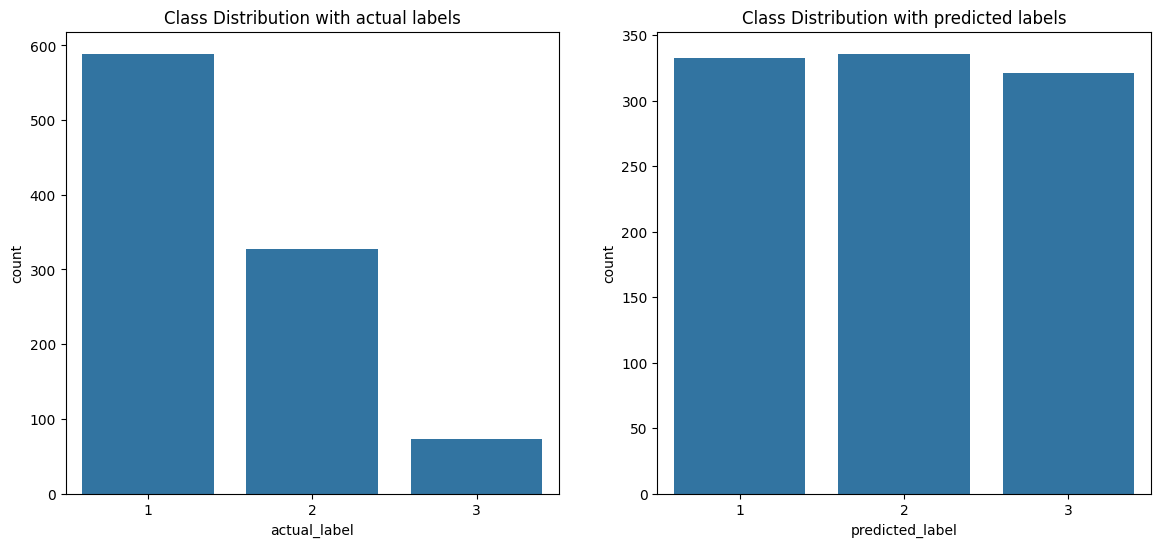

In [165]:
# Class Distribution

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x=actual_label, ax=axs[0])
axs[0].set_title('Class Distribution with actual labels')

sns.countplot(x=predicted_label, ax=axs[1])
axs[1].set_title('Class Distribution with predicted labels')

plt.show()

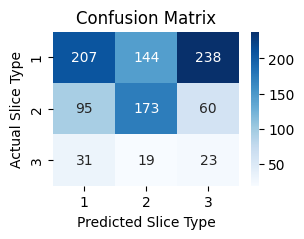

In [166]:
# Confusion Matrix
plt.figure(figsize=(3, 2))
cm = confusion_matrix(actual_label, predicted_label)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(actual_label), yticklabels=np.unique(predicted_label))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')
plt.show()

In [167]:
# Calculate accuracy
print("Accuracy", accuracy_score(actual_label, predicted_label))

# Calculate precision
print("Precision", precision_score(actual_label, predicted_label, average='weighted'))

# Calculate recall
print("Recall", recall_score(actual_label, predicted_label, average='weighted'))

# Calculate F1-score
print("F1-score", f1_score(actual_label, predicted_label, average='weighted'))

Accuracy 0.4070707070707071
Precision 0.5457036536475789
Recall 0.4070707070707071
F1-score 0.44839753486881945


In [168]:
conf_matrix = cm
conf_matrix

array([[207, 144, 238],
       [ 95, 173,  60],
       [ 31,  19,  23]])

In [169]:
# True Positives (TP) for each class
TP_class0 = conf_matrix[0, 0]
TP_class1 = conf_matrix[1, 1]
TP_class2 = conf_matrix[2, 2]

# False Positives (FP) for each class
FP_class0 = np.sum(conf_matrix[0, :]) - TP_class0
FP_class1 = np.sum(conf_matrix[1, :]) - TP_class1
FP_class2 = np.sum(conf_matrix[2, :]) - TP_class2

# False Negatives (FN) for each class
FN_class0 = np.sum(conf_matrix[:, 0]) - TP_class0
FN_class1 = np.sum(conf_matrix[:, 1]) - TP_class1
FN_class2 = np.sum(conf_matrix[:, 2]) - TP_class2

# True Negatives (TN) for each class
TN_class0 = np.sum(conf_matrix) - TP_class0 - FP_class0 - FN_class0
TN_class1 = np.sum(conf_matrix) - TP_class1 - FP_class1 - FN_class1
TN_class2 = np.sum(conf_matrix) - TP_class2 - FP_class2 - FN_class2

# Overall True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = TP_class0 + TP_class1 + TP_class2
FP = FP_class0 + FP_class1 + FP_class2
FN = FN_class0 + FN_class1 + FN_class2
TN = TN_class0 + TN_class1 + TN_class2

# Display the values
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Negatives (TN):", TN)

True Positives (TP): 403
False Positives (FP): 587
False Negatives (FN): 587
True Negatives (TN): 1393


In [170]:
acc = (TP + TN)/(TP + TN + FP + FN)
pres = TP/(TP + FP)
rec = TP/(TP + FN)
f1 = 2 * ((pres * rec)/(pres + rec))
print("Accuracy", acc)
print("Precision", pres)
print("Recall", rec)
print("F1-score", f1)

Accuracy 0.6047138047138048
Precision 0.4070707070707071
Recall 0.4070707070707071
F1-score 0.407070707070707


# **SYNC NOTEBOOKS**

In [172]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp14 & 16 - Slice_Identification_UnSupML_tsne.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'